In [5]:
import os
import uuid
import shutil
#import pylatex
import pandas as pd
import lightkurve as lk 
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

from datetime import datetime
from tqdm.notebook import tqdm
from multiprocessing import cpu_count, Pool
#from pylatex.section import Chapter, Subsection
#from pylatex import Document, Section, Figure, NoEscape, Command

%run pipeline.ipynb

import warnings
warnings.filterwarnings("ignore")

In [7]:
gaiatable=pd.read_csv('makingtable/cleanedgaiadata.csv')
id_table=pd.read_csv('makingtable/idswithdiscopaper.csv')

In [9]:
search_result = lk.search_lightcurve("TIC 177309964", author="SPOC", cadence=120)
#search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 01,2018,SPOC,120,177309964,0.0
1,TESS Sector 02,2018,SPOC,120,177309964,0.0
2,TESS Sector 03,2018,SPOC,120,177309964,0.0
3,TESS Sector 04,2018,SPOC,120,177309964,0.0
4,TESS Sector 05,2018,SPOC,120,177309964,0.0
5,TESS Sector 06,2018,SPOC,120,177309964,0.0
6,TESS Sector 07,2019,SPOC,120,177309964,0.0
7,TESS Sector 08,2019,SPOC,120,177309964,0.0
8,TESS Sector 09,2019,SPOC,120,177309964,0.0


In [11]:
lc_collection = search_result.download_all()

In [19]:
lc_collection= lc_collection[(lc_collection.sector>= 10) & (lc_collection.sector <=11)]

In [23]:
lc_stitched = lc_collection.stitch()

In [29]:
fig=multiplot3(lc_stitched,'TIC-177309964-11-SPOC-120',gaiatable,id_table) 
fig.savefig(f'multiplots/{105}/joint10and11.png',bbox_inches='tight')

In [40]:
fig=subgraph_rp(lc_stitched)
fig.savefig(f'multiplots/{105}/joint10and11river.png',bbox_inches='tight')

In [9]:
lc64=get_lc_string('TIC-300651846-64-SPOC-120').normalize()

In [21]:
fig=subgraph_rp(lc64, period=u.Quantity(0.34417,u.d))
fig.savefig(f'multiplots/{106}/64river.png',bbox_inches='tight')

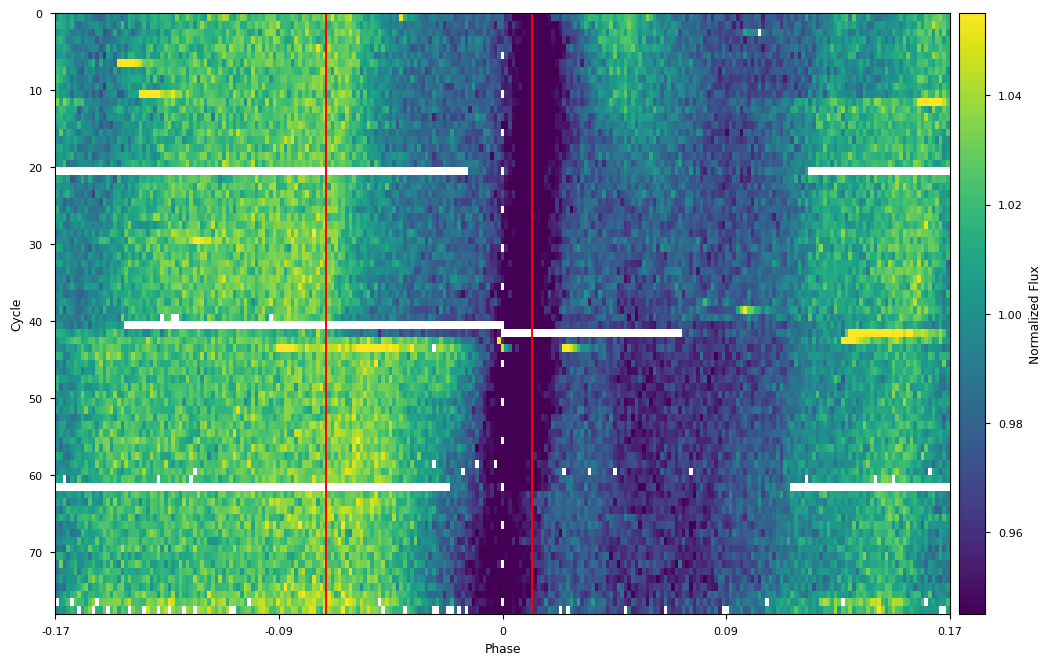

In [19]:
subgraph_rp(lc64, period=u.Quantity(0.34417,u.d))

In [48]:
lc89=get_lc_string('TIC-300651846-89-SPOC-120')
fig=subgraph_rp(lc89)
fig.savefig(f'multiplots/{106}/89river.png',bbox_inches='tight')

In [50]:
lc71=get_lc_string('TIC-59129133-71-FFI-200s')
fig=subgraph_rp(lc71)
fig.savefig(f'multiplots/{0}/71river.png',bbox_inches='tight')

In [95]:
lc2=get_lc_string('EPIC-203050730-2-K2SFF-1800').normalize()
lc91=get_lc_string('TIC-204792541-91-SPOC-120').normalize()
period=u.Quantity(0.4865,u.d)
bintime=u.Quantity(period/200,u.s)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
subgraph_phaselc(lc2,period=period,ax=ax1,bintime=bintime)
subgraph_phaselc(lc91,period=period,ax=ax2,bintime=bintime)
ax2.set_ylabel('')
ax1.set_title('Campaign 2')
ax2.set_title('Sector 91')
fig.suptitle('TIC 204792541')
fig.savefig(f'multiplots/{11}/together.png',bbox_inches='tight')

In [98]:
lc2=get_lc_string('EPIC-203185083-2-K2SFF-1800').normalize()
lc91=get_lc_string('TIC-205060766-91-SPOC-120').normalize()
period=u.Quantity(0.44,u.d)
bintime=u.Quantity(period/200,u.s)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
subgraph_phaselc(lc2,period=period,ax=ax1,bintime=bintime)
subgraph_phaselc(lc91,period=period,ax=ax2,bintime=bintime)
ax2.set_ylabel('')
ax1.set_title('Campaign 2')
ax2.set_title('Sector 91')
fig.suptitle('TIC 205060766')
fig.savefig(f'multiplots/{12}/together.png',bbox_inches='tight')

In [101]:
lc2=get_lc_string('EPIC-203534383-2-K2SFF-1800').normalize()
lc91=get_lc_string('TIC-68502886-91-SPOC-120').normalize()
period=u.Quantity(0.2784,u.d)
bintime=u.Quantity(period/200,u.s)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
subgraph_phaselc(lc2,period=period,ax=ax1,bintime=bintime)
subgraph_phaselc(lc91,period=period,ax=ax2,bintime=bintime)
ax2.set_ylabel('')
ax1.set_title('Campaign 2')
ax2.set_title('Sector 91')
fig.suptitle('TIC 68502886')
fig.savefig(f'multiplots/{13}/together.png',bbox_inches='tight')

In [104]:
lc2=get_lc_string('EPIC-203462615-2-K2SFF-1800').normalize()
lc91=get_lc_string('TIC-66750314-91-SPOC-120').normalize()
period=u.Quantity(0.5201,u.d)
bintime=u.Quantity(period/200,u.s)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))
subgraph_phaselc(lc2,period=period,ax=ax1,bintime=bintime)
subgraph_phaselc(lc91,period=period,ax=ax2,bintime=bintime)
ax2.set_ylabel('')
ax1.set_title('Campaign 2')
ax2.set_title('Sector 91')
fig.suptitle('TIC 66750314')
fig.savefig(f'multiplots/{14}/together.png',bbox_inches='tight')